In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [1]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
t_orig_metadata = '../../refs/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'
mane_file = '../../refs/v40_gene_metadata.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'
mouse_h5 = '../../mouse/lr_bulk/triplets/cerberus_annot_triplets.h5'

orth_table = '../../refs/biomart_human_to_mouse.tsv'

## Human vs mouse sector sankey

In [3]:
# # major isoform triplets mouse match 
# h_source = 'obs_mm_major'
# m_source = 'obs_major'

# df = human_v_mouse_sectors(cerberus_h5,
#                       mouse_h5,
#                       h_source,
#                       m_source,
#                       gene_subset=[gene_subset],
#                       ofile='figures/obs_major_mouse_v_human_triplets_sankey.pdf')

## Simplex plots for human and mouse ARF4 / Arf4

In [3]:
# restrict sample triplets to mm ones
ca = cerberus.read(cerberus_h5)
samples = get_mouse_match_samples()
inds = ca.triplets.loc[(ca.triplets.source == 'sample_det')&\
                       ~(ca.triplets['sample'].isin(samples))].index
ca.triplets.drop(inds, axis=0, inplace=True)
ca.triplets.loc[ca.triplets.source == 'sample_det', 'source'] = 'sample_mm_det'
ca = get_centroids(ca, 
                   source='sample_mm_det',
                   gene_subset=gene_subset,
                   ver=ver)

# add suffix to mouse sources
m_ca = cerberus.read(mouse_h5)
m_ca.triplets.loc[m_ca.triplets.source == 'sample_det', 'source'] ='sample_det_mouse'
m_ca = get_centroids(m_ca,
                     source='sample_det_mouse',
                     gene_subset=gene_subset,
                     ver=mouse_ver)

In [14]:
# # limit triplets so we can hone in on weird behavior
# ca.triplets = ca.triplets.loc[ca.triplets.source == 'sample_mm_det_centroid']
# print(len(ca.triplets.index))

# m_ca.triplets = m_ca.triplets.loc[m_ca.triplets.source == 'sample_det_mouse_centroid']
# print(len(m_ca.triplets.index))

In [5]:
# plot_human_mouse_simplex(ca, m_ca, 'ARF4', 'Arf4', 'figures/')

In [15]:
hm_gids = get_human_mouse_gid_table(orth_table)
print(len(hm_gids.index))

16734


In [7]:
# # merge in mouse gids that we need
# print(len(ca.triplets.index))
# temp1 = ca.triplets.merge(hm_gids, how='inner', left_on='gid', right_on='Gene stable ID')
# print(temp1.loc[temp1.gid.duplicated(keep=False)].sort_values(by='gid'))
# print(len(temp1.loc[temp1.gid.duplicated(keep=False), 'gid'].unique()))

# print(len(temp1.index))

# print()

# # merge in mouse data
# print(len(m_ca.triplets.index))
# # something about this merge makes the below merge not 15828 or w/e the number from the comparison is
# temp2 = m_ca.triplets.merge(hm_gids, how='inner', left_on='gid', right_on='Mouse gene stable ID')
# print(len(temp2.index))

16090
Empty DataFrame
Columns: [source, gid, n_tss, n_tes, n_ic, n_iso, splicing_ratio, tss_ratio, tes_ratio, spl_ratio, sector, gname, sample, gene_tpm, Gene stable ID, Mouse gene stable ID]
Index: []
0
13895

17334
14683


In [12]:
# temp = temp1.merge(temp2, how='inner',
#                          left_on='Mouse gene stable ID', right_on='gid', suffixes=('_human', '_mouse'))
# len(temp.index)

In [13]:
# temp = ca.triplets.merge(m_ca.triplets, how='inner',
#                          left_on='Mouse gene stable ID', right_on='gid', suffixes=('_human', '_mouse'))

In [16]:
# merge in mouse gids that we need
ca.triplets = ca.triplets.merge(hm_gids, how='inner', left_on='gid', right_on='Gene stable ID')

# merge in mouse data
m_ca.triplets = m_ca.triplets.merge(hm_gids, how='inner', left_on='gid', right_on='Mouse gene stable ID')

In [12]:
# # concatenate the dfs
# ca.triplets = pd.concat([ca.triplets, m_ca.triplets], axis=0)

In [17]:
df = compute_dists([ca, m_ca],
                   ['sample_mm_det_centroid', 
                   'sample_det_mouse_centroid'],
                   gene_subsets=[gene_subset, gene_subset],
                   ver=[ver,  mouse_ver],
                   gene_merge=['Gene stable ID'])

In [18]:
df.loc[df.gname_sample_mm_det_centroid == 'ARF4']

,source_sample_mm_det_centroid,gid_sample_mm_det_centroid,n_tss_sample_mm_det_centroid,n_tes_sample_mm_det_centroid,n_ic_sample_mm_det_centroid,n_iso_sample_mm_det_centroid,splicing_ratio_sample_mm_det_centroid,tss_ratio_sample_mm_det_centroid,tes_ratio_sample_mm_det_centroid,spl_ratio_sample_mm_det_centroid,...,sample_sample_det_mouse_centroid,gene_tpm_sample_det_mouse_centroid,tissue,tissue_adult,sector_sample_det_mouse_centroid,Mouse gene stable ID_sample_det_mouse_centroid,gid_stable_sample_det_mouse_centroid,biotype_sample_det_mouse_centroid,dist,z_score
650,sample_mm_det_centroid,ENSG00000168374,1.0,1.0,3.111111,3.111111,3.111111,0.206614,0.206614,0.586772,...,NaN,NaN,NaN,NaN,tes,ENSMUSG00000021877,ENSMUSG00000021877,protein_coding,0.348437,3.94201


In [19]:
n = len(df.index)
n_num = len(df.loc[df.z_score > 2].index)
print(f'{(n_num/n)*100:.2f}% of orthologous genes ({n_num}/{n}) have dist z-score > 2')

4.31% of orthologous genes (584/13536) have dist z-score > 2


## ARF4 / Arf4 browser plots

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2033: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2032: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples


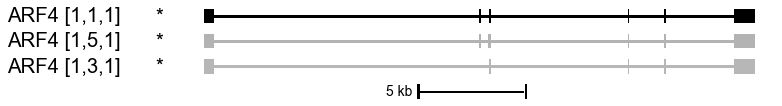

In [34]:
plot_browser_isos_2(cerberus_h5,
                    swan_file, 
                    filt_ab,
                    major_isos,
                    'ARF4',
                    obs_col,
                    'h1',
                    'figures/arf4_h1_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['v29', 'v40'])

Read in graph from ../../mouse/lr_bulk/swan/swan.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2033: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2032: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 149463
# isos >= 1 tpm: 138642
Applying gene type and novelty subset
Number of isos reported: 135450
Found 37 total samples


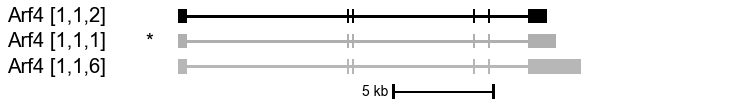

In [3]:
plot_browser_isos_2(mouse_h5,
                    mouse_swan_file, 
                    mouse_filt_ab,
                    '',
                    'Arf4',
                    obs_col,
                    'f1219',
                    'figures/arf4_f1219_browser_isos.pdf',
                    h=0.2,
                    ref_sources=['vM21', 'vM25'],
                    species='mouse')